In [2]:
import mne

In [1]:
data_dir = "Processed"

In [3]:
epochs = mne.read_epochs(f"{data_dir}/epo.fif", preload=True).set_montage("standard_1020")
clean_epochs = mne.read_epochs(f"{data_dir}/clean-epo.fif", preload=True).set_montage("standard_1020")

Reading /mnt/c/Users/Diego/OneDrive/Documents/Coding/Neurotech/DataAnalysis/Processed/epo.fif ...


/tmp/ipykernel_111207/2711130859.py:1: RuntimeWarning: This filename (Processed/epo.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(f"{data_dir}/epo.fif", preload=True).set_montage("standard_1020")


    Found the data of interest:
        t =    -500.00 ...    3000.00 ms
        0 CTF compensation matrices available
Adding metadata with 1 columns
927 matching events found
No baseline correction applied
0 projection items activated
Reading /mnt/c/Users/Diego/OneDrive/Documents/Coding/Neurotech/DataAnalysis/Processed/clean-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    3000.00 ms
        0 CTF compensation matrices available
Adding metadata with 1 columns
533 matching events found
No baseline correction applied
0 projection items activated


In [15]:
conditions = ['TP', 'FN', 'FP', 'TN']
evokeds = {c:epochs[c].average() for c in conditions}
evokeds    

conditions = ['TP', 'FN', 'FP', 'TN']
clean_evokeds = {c:clean_epochs[c].average() for c in conditions}
clean_evokeds    

{'TP': <Evoked | 'TP' (average, N=72), -0.5 – 3 s, baseline -0.5 – 0 s, 8 ch, ~74 KiB>,
 'FN': <Evoked | 'FN' (average, N=37), -0.5 – 3 s, baseline -0.5 – 0 s, 8 ch, ~74 KiB>,
 'FP': <Evoked | 'FP' (average, N=42), -0.5 – 3 s, baseline -0.5 – 0 s, 8 ch, ~74 KiB>,
 'TN': <Evoked | 'TN' (average, N=382), -0.5 – 3 s, baseline -0.5 – 0 s, 8 ch, ~74 KiB>}

No projector specified for this dataset. Please consider the method self.add_proj.


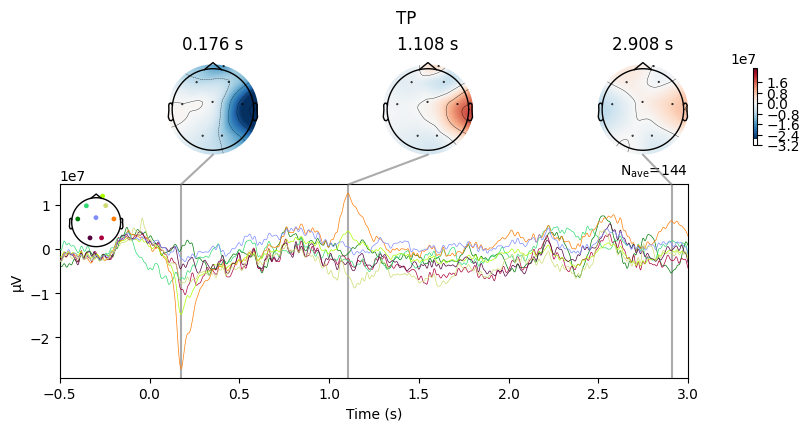

No projector specified for this dataset. Please consider the method self.add_proj.


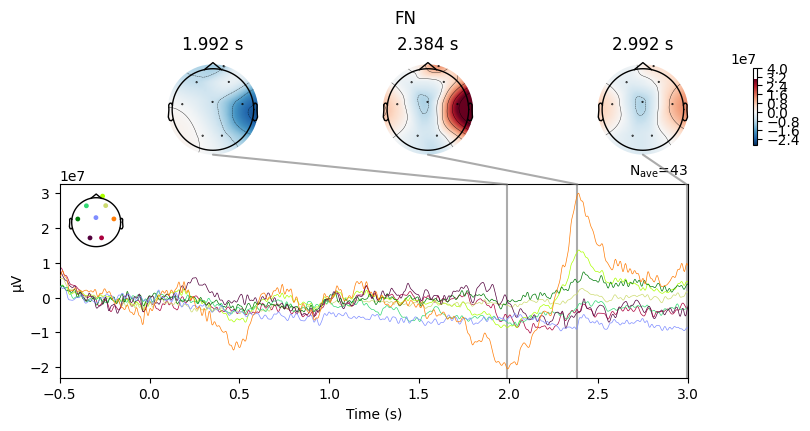

No projector specified for this dataset. Please consider the method self.add_proj.


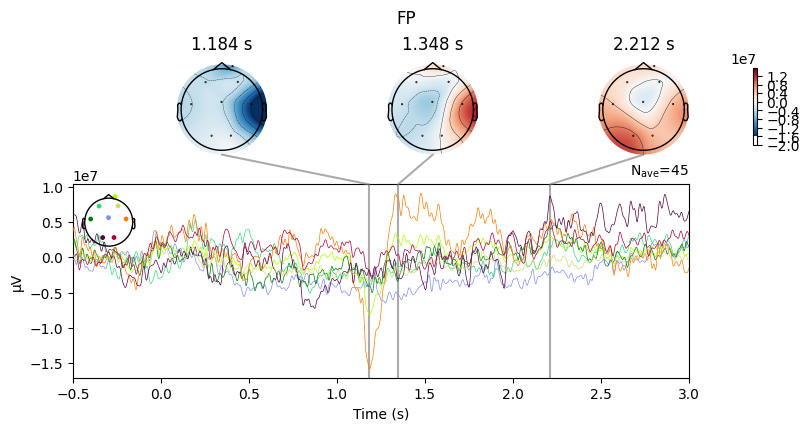

No projector specified for this dataset. Please consider the method self.add_proj.


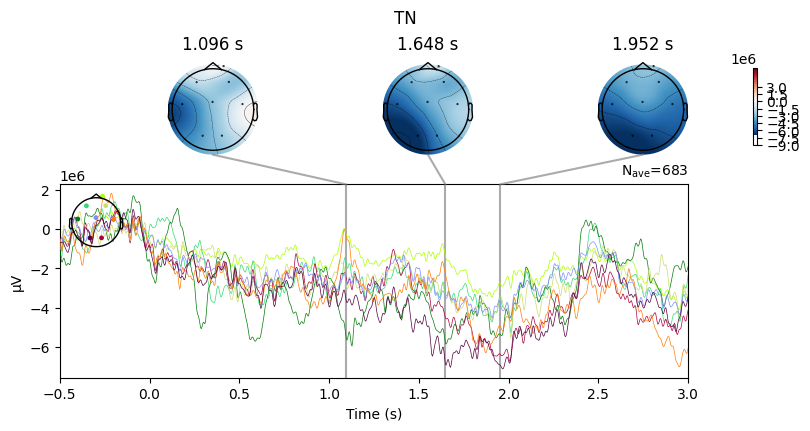

In [7]:
for c in evokeds.keys():
  evokeds[c].plot_joint(title=c);

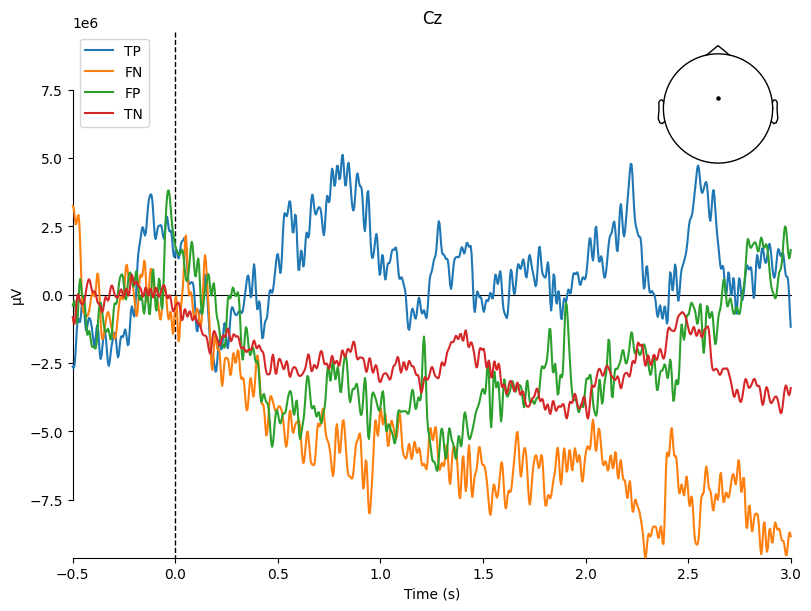

In [18]:
mne.viz.plot_compare_evokeds(evokeds, picks='Cz');

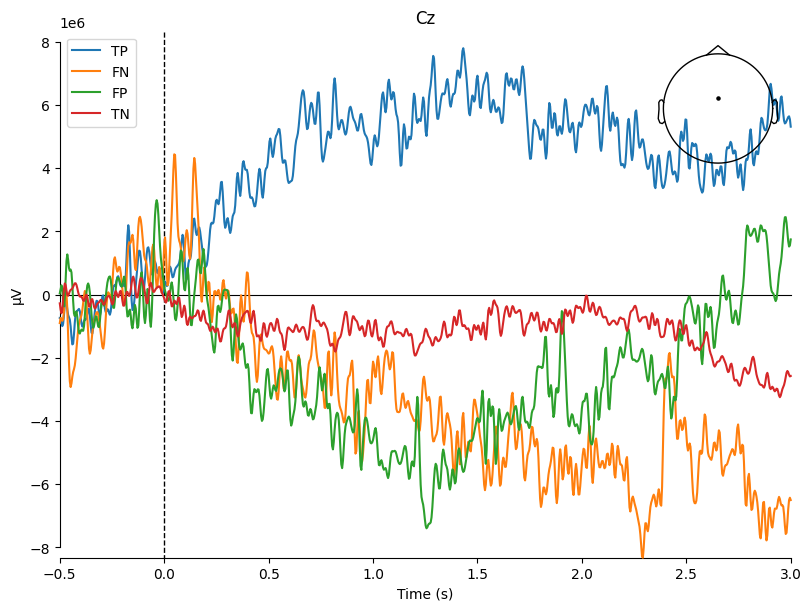

In [24]:
mne.viz.plot_compare_evokeds(clean_evokeds, picks='Cz');

    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/home/diego/.local/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
/home/diego/.local/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/home/diego/.local/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
/home/diego/.local/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


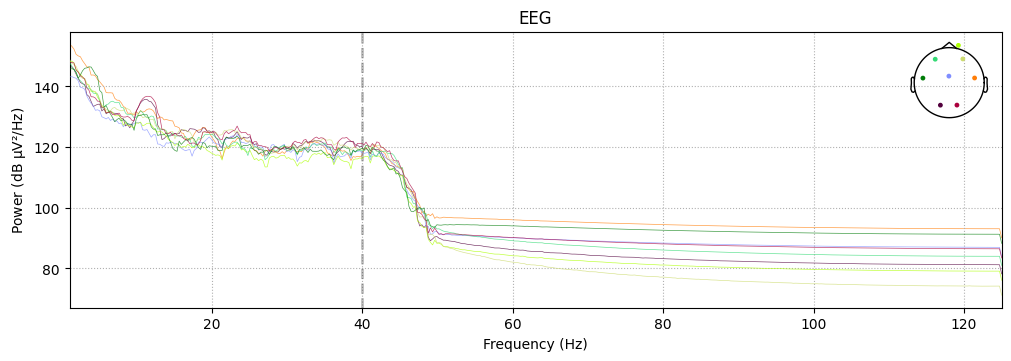

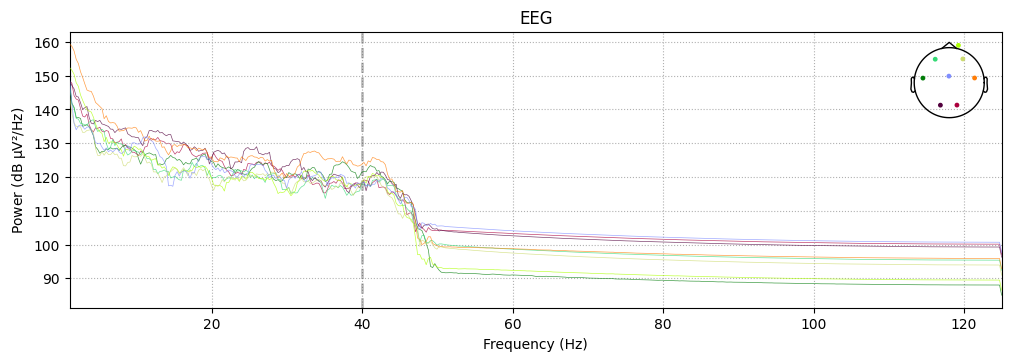

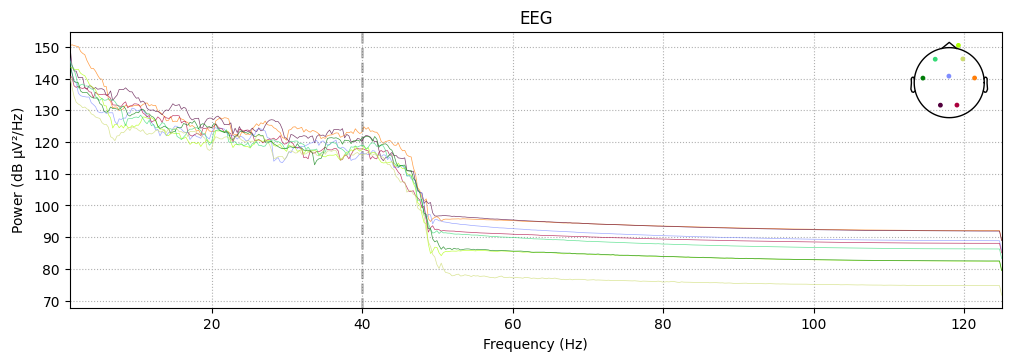

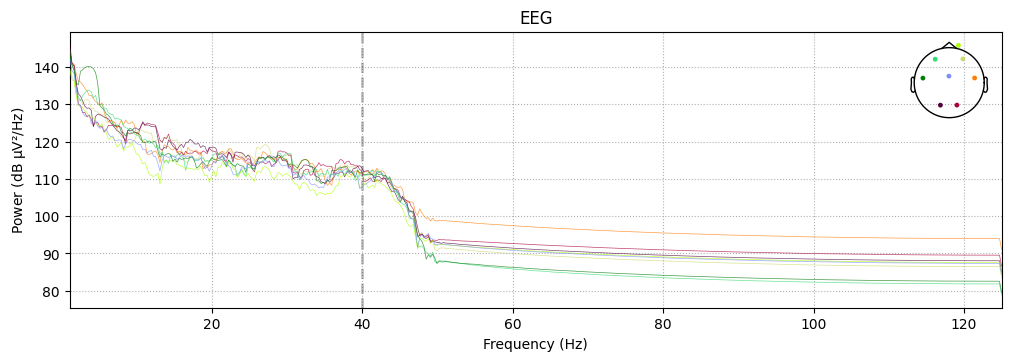

In [30]:
for cond in conditions:
    evokeds[cond].compute_psd(fmin=1, fmax=125).plot()

In [ ]:
clean_evokeds.compute_psd().plot()